In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [76]:
df=pd.read_csv("C:/Users/rfpaw/Downloads/ML_Project_Essentials/hr_data.csv")

In [77]:
df

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,996,2187705,Yes,19,30,E1,15.38,26.92,10.00,No,Yes,Male,Direct,1,INFRA,Noida,27,Joined
767,997,2187909,No,2,0,E3,30.00,100.00,53.85,No,No,Male,Employee Referral,5,INFRA,Noida,33,Not Joined
768,998,2187922,No,6,60,E1,78.57,25.00,-30.00,No,No,Male,Direct,3,ERS,Bangalore,32,Joined
769,999,2188037,No,3,30,E1,104.08,104.08,0.00,No,No,Male,Employee Referral,3,ERS,Chennai,28,Joined


In [78]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [79]:
df.columns

Index(['SLNO', 'Candidate Ref', 'DOJ Extended', 'Duration to accept offer',
       'Notice period', 'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         771 non-null    int64  
 1   Candidate Ref                771 non-null    int64  
 2   DOJ Extended                 771 non-null    object 
 3   Duration to accept offer     771 non-null    int64  
 4   Notice period                771 non-null    int64  
 5   Offered band                 771 non-null    object 
 6   Pecent hike expected in CTC  771 non-null    float64
 7   Percent hike offered in CTC  771 non-null    float64
 8   Percent difference CTC       771 non-null    float64
 9   Joining Bonus                771 non-null    object 
 10  Candidate relocate actual    771 non-null    object 
 11  Gender                       771 non-null    object 
 12  Candidate Source             771 non-null    object 
 13  Rex in Yrs          

In [81]:
df.dtypes

SLNO                             int64
Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer         int64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

In [82]:
df.shape

(771, 18)

In [83]:
df.size

13878

In [84]:
df.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

# Performing LabelEncoding On DataSet

In [85]:
le=LabelEncoder()

In [86]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [87]:
df["DOJ Extended"]=le.fit_transform(df["DOJ Extended"])
df["Offered band"]=le.fit_transform(df["Offered band"])
df["Joining Bonus"]=le.fit_transform(df["Joining Bonus"])
df["Candidate relocate actual"]=le.fit_transform(df["Candidate relocate actual"])
df["Gender"]=le.fit_transform(df["Gender"])
df["Candidate Source"]=le.fit_transform(df["Candidate Source"])
df["LOB"]=le.fit_transform(df["LOB"])
df["Location"]=le.fit_transform(df["Location"])
df["Status"]=le.fit_transform(df["Status"])

In [88]:
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,1,14,30,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34,0
1,2,2112635,0,18,30,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34,0
2,3,2112838,0,3,45,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27,0
3,4,2115021,0,26,30,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34,0
4,5,2115125,1,1,120,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34,0


In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,771.0,5.020519e+02,293.929265,1.00,243.500,507.00,755.500,1000.00
Candidate Ref,771.0,2.496696e+06,488948.459714,2109586.00,2155980.000,2184706.00,2814396.000,3828911.00
DOJ Extended,771.0,4.876783e-01,0.500173,0.00,0.000,0.00,1.000,1.00
Duration to accept offer,771.0,2.069650e+01,25.979937,0.00,2.000,9.00,31.000,210.00
Notice period,771.0,3.787938e+01,25.835589,0.00,30.000,30.00,60.000,120.00
Offered band,771.0,1.639429e+00,0.691095,0.00,1.000,2.00,2.000,3.00
Pecent hike expected in CTC,771.0,4.600030e+01,55.741961,-68.83,23.460,38.89,51.245,359.77
Percent hike offered in CTC,771.0,4.500629e+01,56.780803,-60.53,19.865,37.18,50.000,471.43
Percent difference CTC,771.0,2.270208e+00,30.834215,-67.27,-7.690,0.00,0.000,300.00
Joining Bonus,771.0,4.280156e-02,0.202541,0.00,0.000,0.00,0.000,1.00


# Changing DataTypes of Data in Dataset

In [90]:
df["Pecent hike expected in CTC"]=df["Pecent hike expected in CTC"].astype("int")
df["Percent hike offered in CTC"]=df["Percent hike offered in CTC"].astype("int")
df["Percent difference CTC"]=df["Percent difference CTC"].astype("int")

In [91]:
df.dtypes

SLNO                           int64
Candidate Ref                  int64
DOJ Extended                   int32
Duration to accept offer       int64
Notice period                  int64
Offered band                   int32
Pecent hike expected in CTC    int32
Percent hike offered in CTC    int32
Percent difference CTC         int32
Joining Bonus                  int32
Candidate relocate actual      int32
Gender                         int32
Candidate Source               int32
Rex in Yrs                     int64
LOB                            int32
Location                       int32
Age                            int64
Status                         int32
dtype: object

# Removing Outliers present in Dataset

<Axes: >

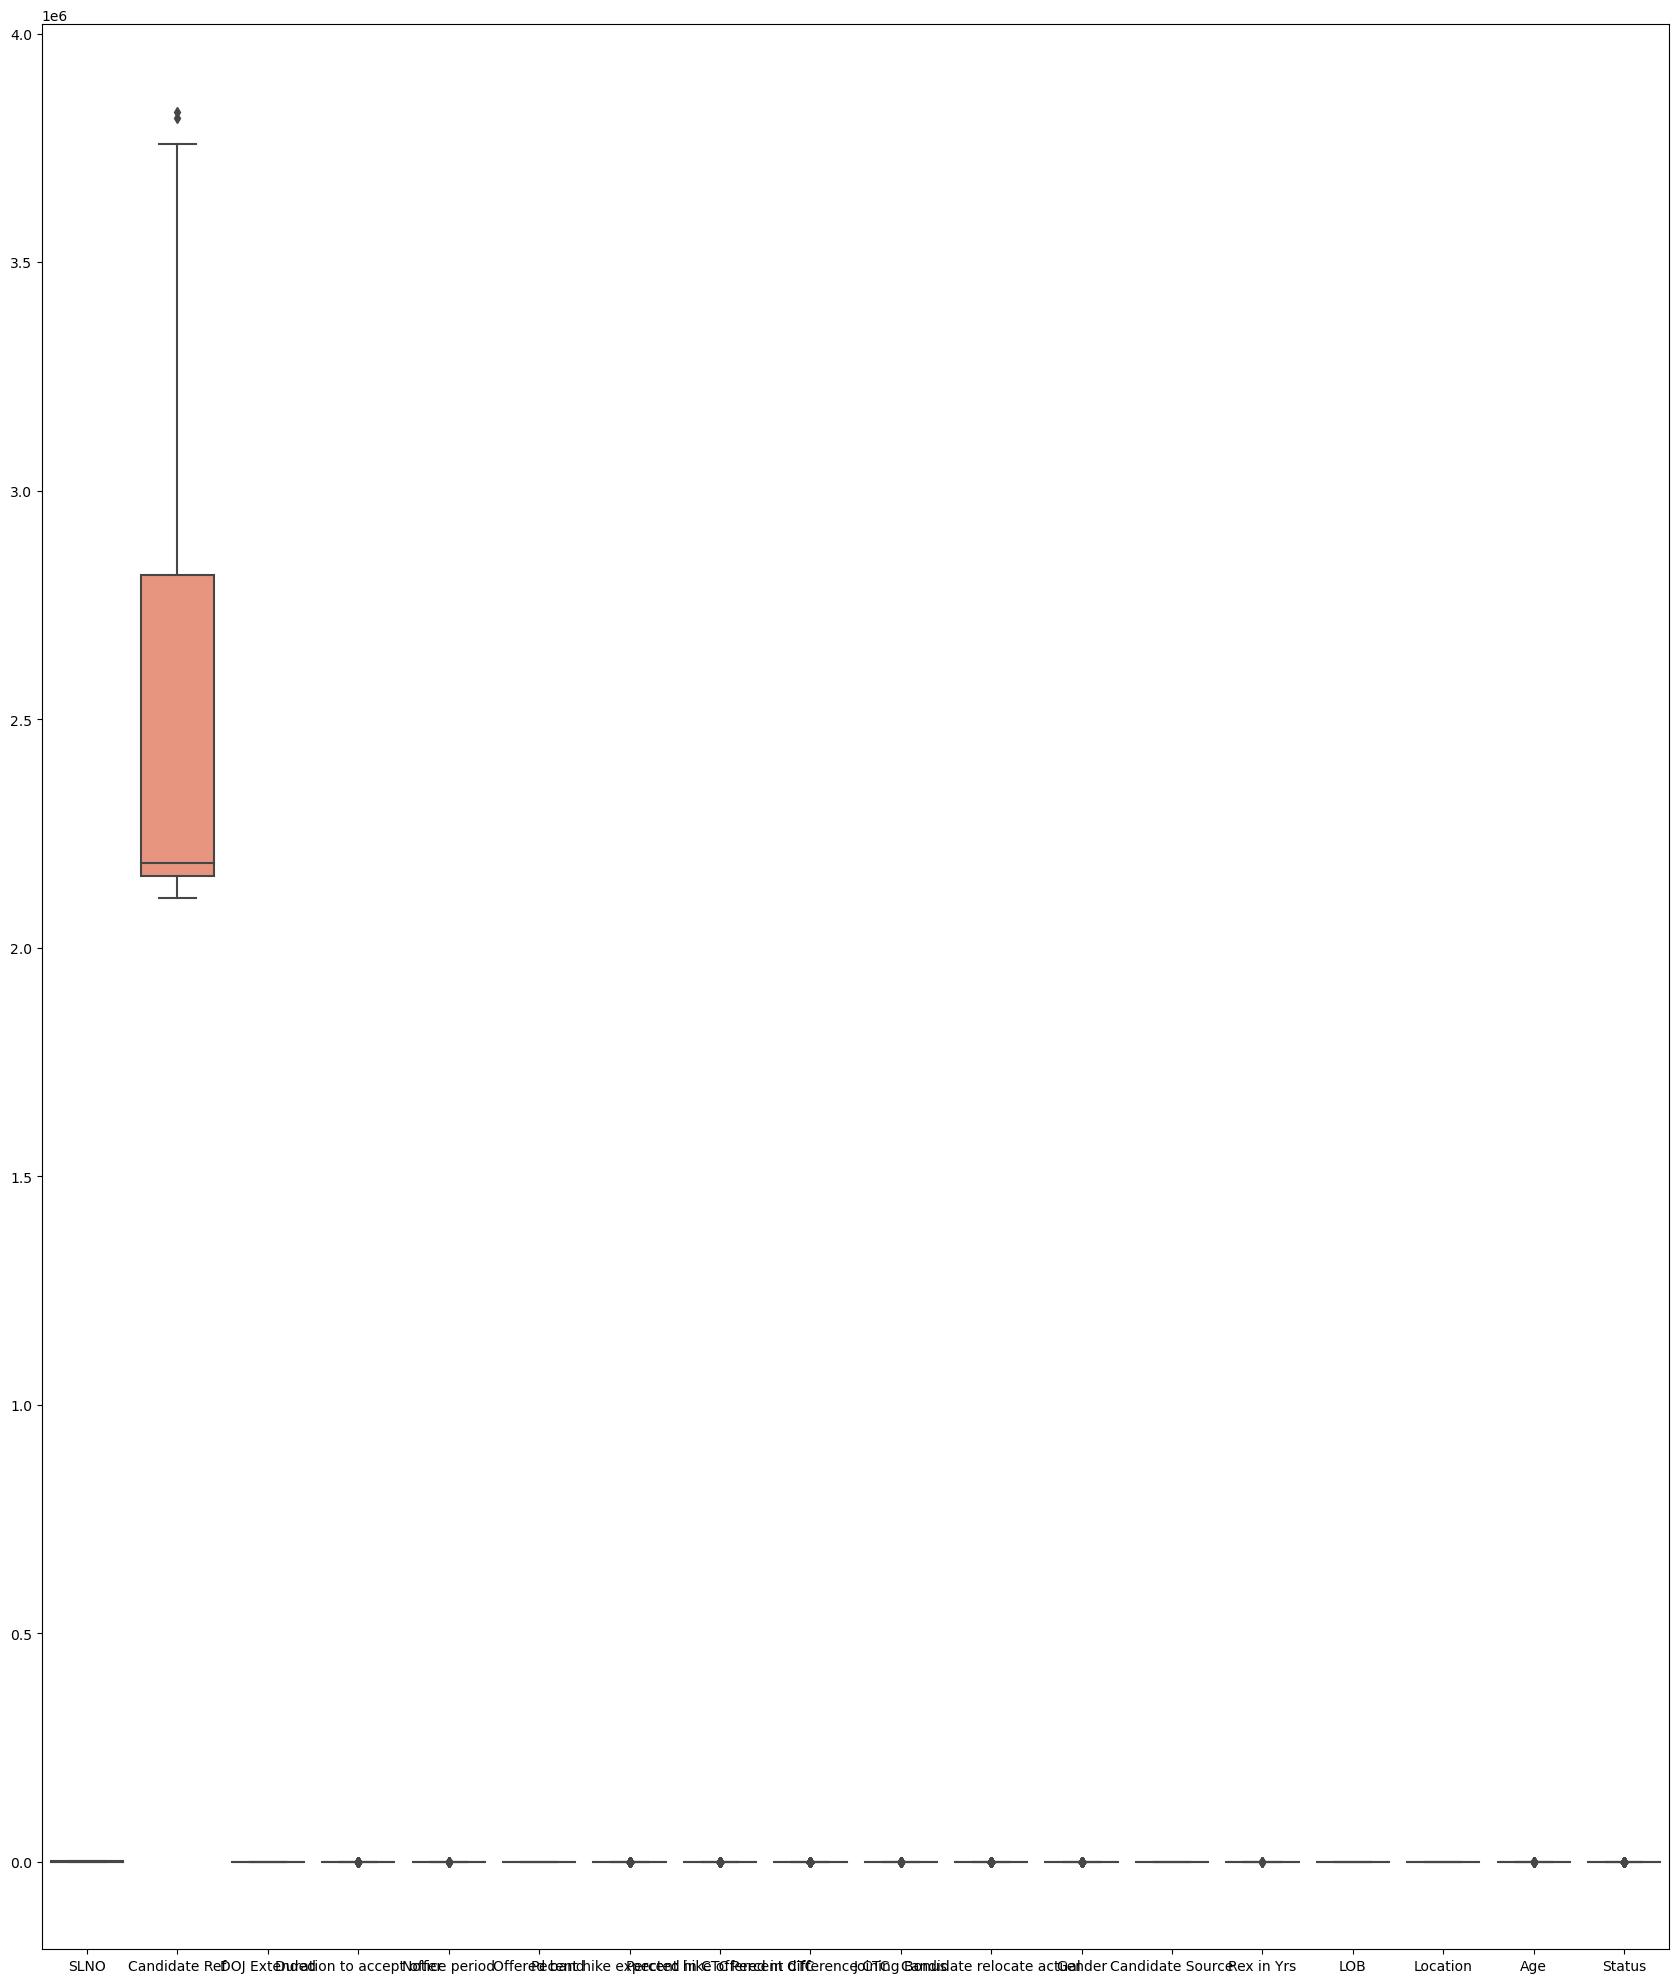

In [92]:
plt.figure(figsize=(21,25))         # Ploting Boxplot to detect outliers 
sns.boxplot(data=df)

# Steps to Remove Outliers

In [93]:
Q1=df.quantile(q=0.25)          # finding Q1 value 
Q3=df.quantile(q=0.75)          # finding Q3 value
IQR=Q3-Q1                        # finding IQR value
upper=Q3+(1.5*IQR)               # to detect upper outliers 
lower=Q1-(1.5*IQR)               # to detect lower outliers

In [94]:
df1=df[~((df>upper)|(df<lower))]

<Axes: >

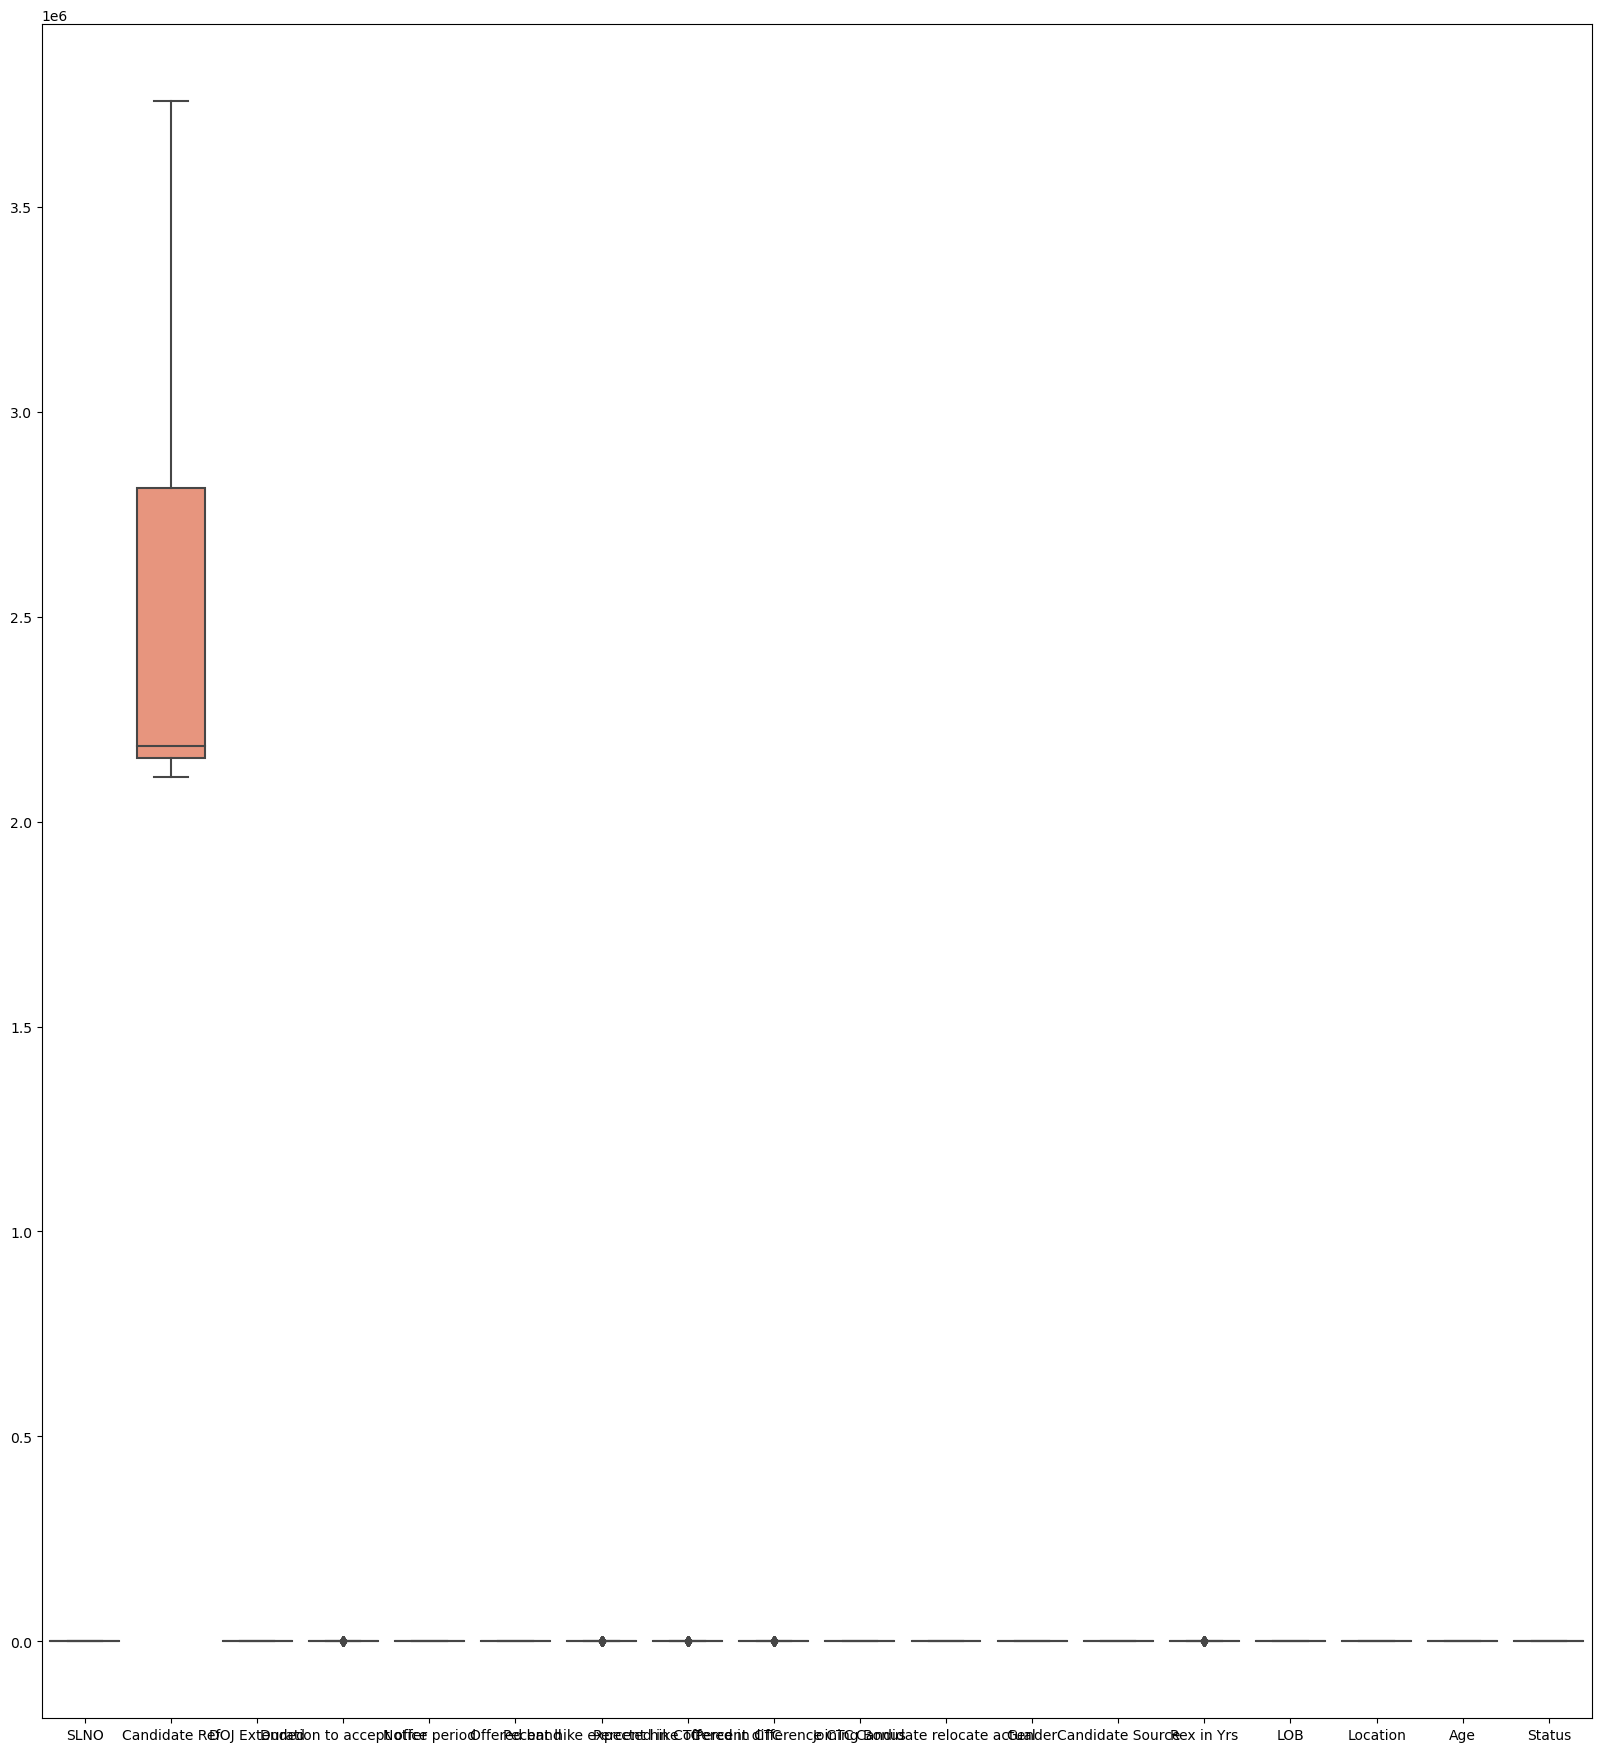

In [95]:
plt.figure(figsize=(20,22))          # Boxplot after removing Outliers 
sns.boxplot(df1)

In [96]:
df1.isnull().sum()        # After removing outlier we get some nan values

SLNO                             0
Candidate Ref                    2
DOJ Extended                     0
Duration to accept offer        40
Notice period                   13
Offered band                     0
Pecent hike expected in CTC    114
Percent hike offered in CTC     97
Percent difference CTC         189
Joining Bonus                   33
Candidate relocate actual      145
Gender                         110
Candidate Source                 0
Rex in Yrs                       6
LOB                              0
Location                         0
Age                             20
Status                         115
dtype: int64

In [153]:
df2=df1.dropna()      # removing that nan values

In [154]:
df2.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

# HeatMap To Show Corelation between Data

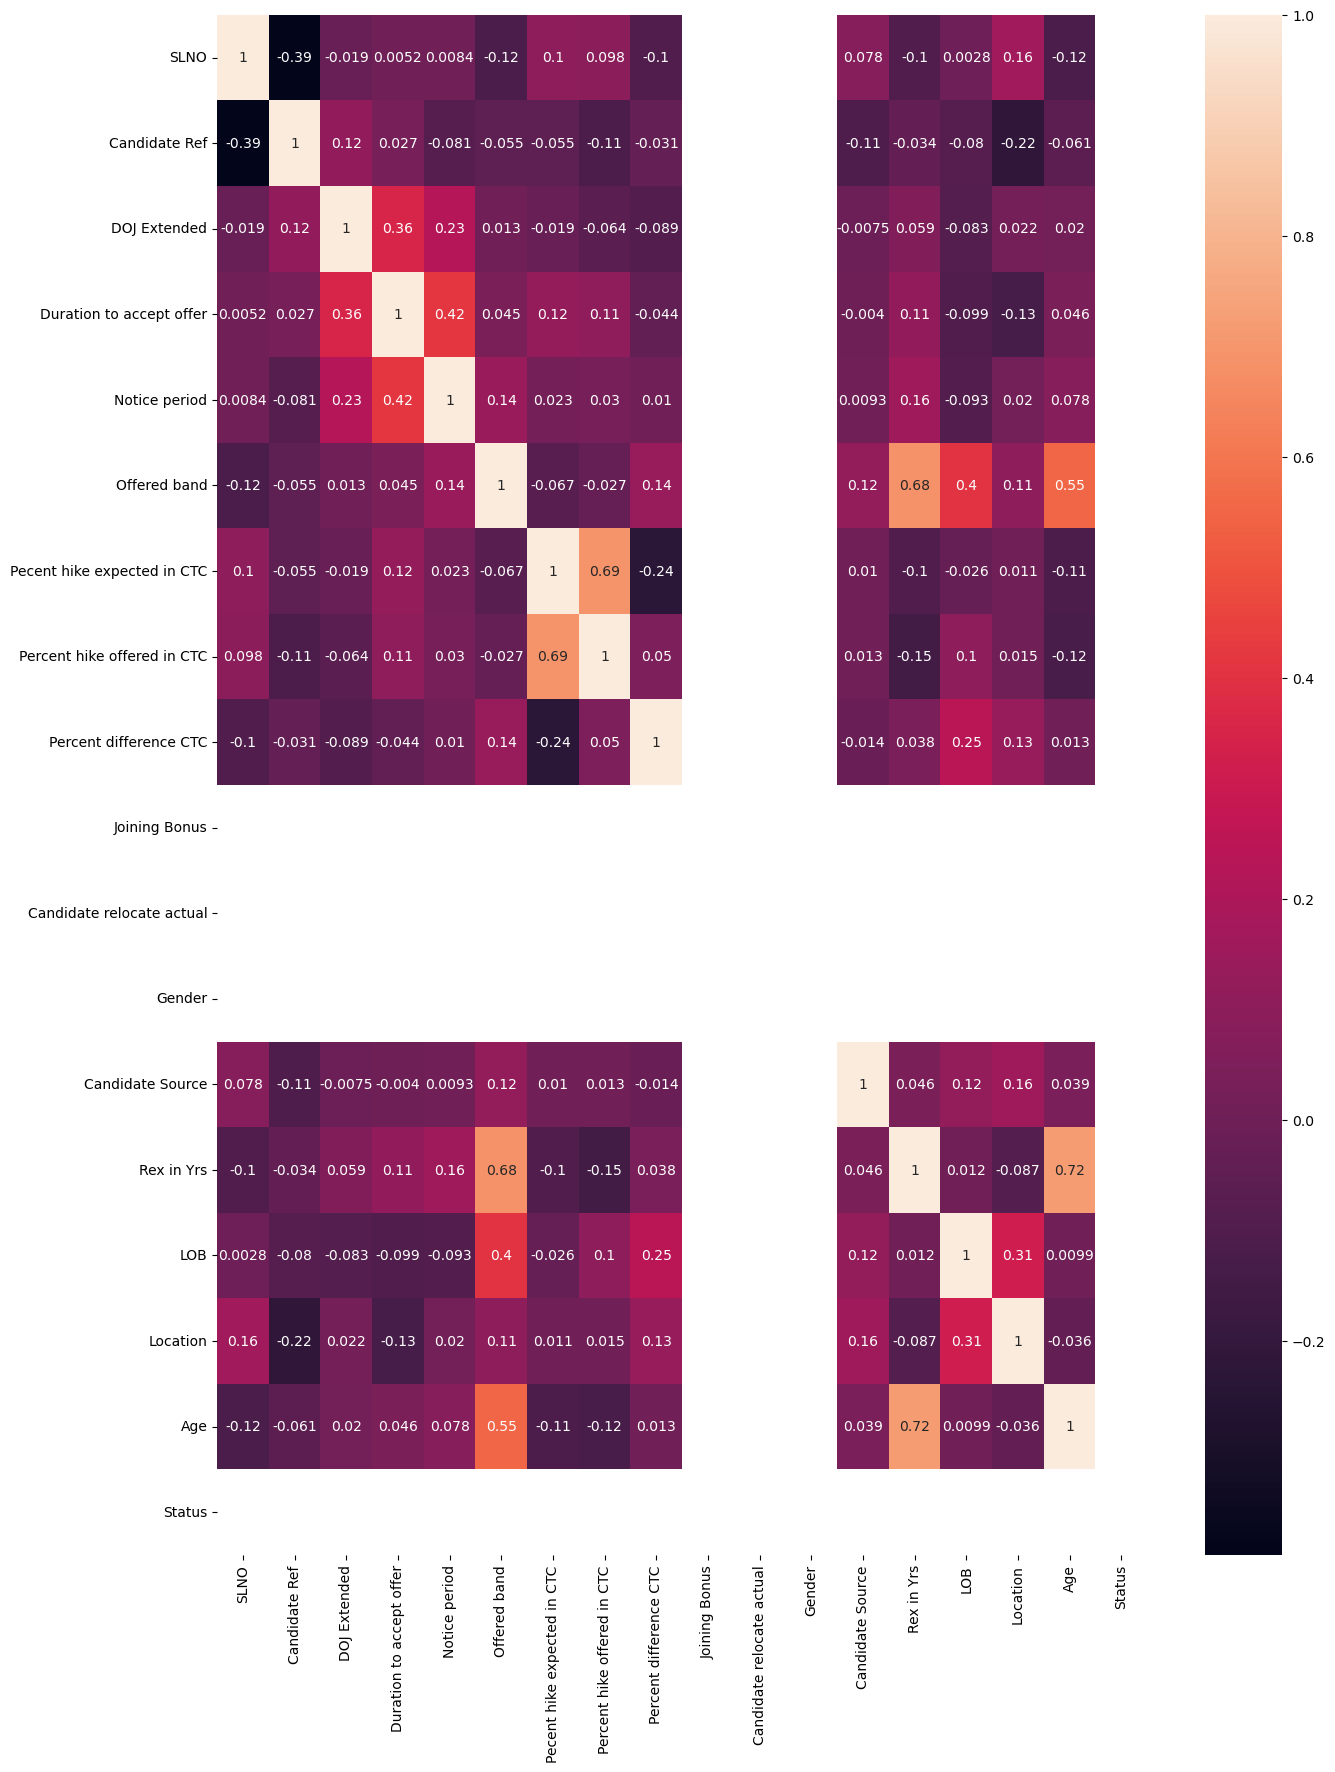

In [99]:
plt.figure(figsize=(15,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [100]:
print(df1["DOJ Extended"].unique())
print(df1["DOJ Extended"].value_counts(normalize=True)*100)

[1 0]
DOJ Extended
0    51.232166
1    48.767834
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x2bc8313efd0>,
 [Text(-0.02133045223665261, 1.0997931677399075, 'Yes'),
  Text(0.02133045223665248, -1.0997931677399075, 'No')])

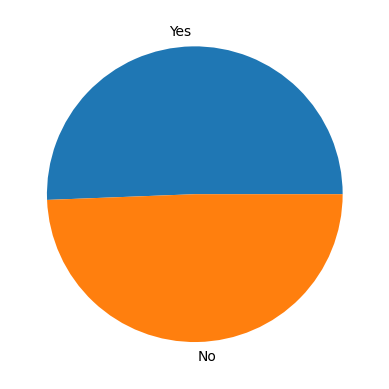

In [101]:
plt.pie(df2["DOJ Extended"].value_counts(normalize=True)*100,labels=['Yes','No'])

# Model Building For Dataset

In [102]:
x=df2.drop(["DOJ Extended"],axis=1)
y=df2["DOJ Extended"]

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 17)
(73, 17)
(170,)
(73,)


# Logistic Regression Algorithm

In [105]:
le=LogisticRegression()
le.fit(x_train,y_train)

LogisticRegression()

In [106]:
y_true,y_pred=y_test,le.predict(x_test)
print(le.score(x_train,y_train)*100)
print(le.score(x_test,y_test)*100)

51.76470588235295
43.83561643835616


In [107]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

43.83561643835616
100.0
43.83561643835616


# Random Forest Classifier Algorithm

In [135]:
rf=RandomForestClassifier(n_estimators=6,random_state=1) 
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=6, random_state=1)

In [136]:
y_true,y_pred=y_test,rf.predict(x_test)
print(rf.score(x_train,y_train)*100)
print(rf.score(x_test,y_test)*100)

97.05882352941177
67.12328767123287


In [137]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

61.76470588235294
65.625
67.12328767123287


# Decision Tree Classifier Algorithm

In [138]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [139]:
y_true,y_pred=y_test,dt.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

87.05882352941177
69.86301369863014


In [140]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

63.1578947368421
75.0
69.86301369863014


# Gradient Boosting Classifier Algorithm

In [141]:
gb=GradientBoostingClassifier(n_estimators=20)
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=20)

In [142]:
y_true,y_pred=y_test,gb.predict(x_test)
print(gb.score(x_train,y_train)*100)
print(gb.score(x_test,y_test)*100)

91.76470588235294
71.23287671232876


In [143]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

63.41463414634146
81.25
71.23287671232876


# BAGGING CLASSIFIER ALGORITHM

In [144]:
bg=BaggingClassifier(n_estimators=20)
bg.fit(x_train,y_train)

BaggingClassifier(n_estimators=20)

In [145]:
y_true,y_pred=y_test,bg.predict(x_test)
print(bg.score(x_train,y_train)*100)
print(bg.score(x_test,y_test)*100)

98.82352941176471
65.75342465753424


In [146]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

59.45945945945946
68.75
65.75342465753424


# ADABOOST CLASSIFIER ALGORITHM

In [147]:
ad=AdaBoostClassifier(n_estimators=20,estimator=dt,random_state=1)
ad.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   n_estimators=20, random_state=1)

In [148]:
y_true,y_pred=y_test,ad.predict(x_test)
print(ad.score(x_train,y_train)*100)
print(ad.score(x_test,y_test)*100)

100.0
68.4931506849315


In [149]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

62.16216216216216
71.875
68.4931506849315


# KNeighbors CLASSIFIER ALGORITHM

In [150]:
kn=KNeighborsClassifier(weights="distance")    
kn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [151]:
y_true,y_pred=y_test,kn.predict(x_test)
print(kn.score(x_train,y_train)*100)
print(kn.score(x_test,y_test)*100)

100.0
54.794520547945204


In [152]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

48.717948717948715
59.375
54.794520547945204


# SVC (SUPPORT VECTOR CLASSIFIER) ALGORITHM

In [126]:
svc=SVC(C=1.0,kernel="linear")   
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [127]:
y_true,y_pred=y_test,svc.predict(x_test)
print(svc.score(x_train,y_train)*100)
print(svc.score(x_test,y_test)*100)

58.82352941176471
54.794520547945204


In [128]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

49.056603773584904
81.25
54.794520547945204


In [ ]:
#Most accurate algorithm for this model is gradient boosting algorithm with 71% of accuracy